In [ ]:
#K-Medoids untuk mengetahui pengeluaran di Mall berdasarkan usia

In [ ]:
#meng-import library yang diperlukan
!pip install https://github.com/scikit-learn-contrib/scikit-learn-extra/archive/master.zip

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import seaborn as sns
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples,silhouette_score

  Using cached https://github.com/scikit-learn-contrib/scikit-learn-extra/archive/master.zip
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.1.0b2-cp36-cp36m-linux_x86_64.whl size=617881 sha256=3a67c59090ec7744b26d67ba44d4e998c641cf306923e7dfb7cda62964991519
  Stored in directory: /tmp/pip-ephem-wheel-cache-221_9521/wheels/d3/a5/a8/411bc2d0939f2cc9d17f34f0d3457043c68e14a98b91fd8301
Successfully built scikit-learn-extra


In [ ]:
#untuk upload file dataset
#upload dilakukan secara manual
from google.colab import files
uploaded = files.upload()

#Memanggil file dataset yang digunakan
dataset_cust = pd.read_excel('Mall_Customers.xlsx')
dataset_cust.head()

Saving Mall_Customers.xlsx to Mall_Customers.xlsx


,CustomerID,Genre,Age,AnnualIncome(k$),SpendingScore(1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#mengubah bentuk data string yang ada pada Genre (Jenis Kelamin) menjadi bentuk data numerik
dataset_cust['Genre'].replace(['Male', 'Female'], [0,1], inplace=True)

In [ ]:
dataset_cust = dataset_cust.rename(columns={
                                'AnnualIncome(k$)': 'Annual_Income',
                                'SpendingScore(1-100)': 'Spending_Score'}
                       )
dataset_cust.head()

,CustomerID,Genre,Age,Annual_Income,Spending_Score
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [ ]:
dataset_cust = dataset_cust.drop(["Annual_Income", "Genre"], axis = 1)
dataset_cust.head()

,CustomerID,Age,Spending_Score
0,1,19,39
1,2,21,81
2,3,20,6
3,4,23,77
4,5,31,40


In [ ]:
dataset_cust_x = dataset_cust.iloc[:, 1:4]
dataset_cust_x.head()

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


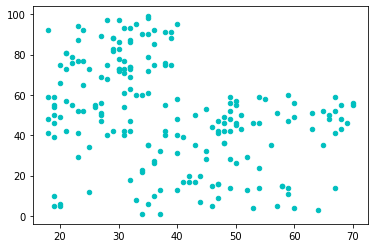

In [ ]:
plt.scatter(
            dataset_cust.Age, 
            dataset_cust.Spending_Score, 
            s =20, c = "c", marker = "o", alpha = 1) #s=Size
plt.show()

In [ ]:
x_array =  np.array(dataset_cust_x)
print(x_array)

[[19 39]
 [21 81]
 [20  6]
 [23 77]
 [31 40]
 [22 76]
 [35  6]
 [23 94]
 [64  3]
 [30 72]
 [67 14]
 [35 99]
 [58 15]
 [24 77]
 [37 13]
 [22 79]
 [35 35]
 [20 66]
 [52 29]
 [35 98]
 [35 35]
 [25 73]
 [46  5]
 [31 73]
 [54 14]
 [29 82]
 [45 32]
 [35 61]
 [40 31]
 [23 87]
 [60  4]
 [21 73]
 [53  4]
 [18 92]
 [49 14]
 [21 81]
 [42 17]
 [30 73]
 [36 26]
 [20 75]
 [65 35]
 [24 92]
 [48 36]
 [31 61]
 [49 28]
 [24 65]
 [50 55]
 [27 47]
 [29 42]
 [31 42]
 [49 52]
 [33 60]
 [31 54]
 [59 60]
 [50 45]
 [47 41]
 [51 50]
 [69 46]
 [27 51]
 [53 46]
 [70 56]
 [19 55]
 [67 52]
 [54 59]
 [63 51]
 [18 59]
 [43 50]
 [68 48]
 [19 59]
 [32 47]
 [70 55]
 [47 42]
 [60 49]
 [60 56]
 [59 47]
 [26 54]
 [45 53]
 [40 48]
 [23 52]
 [49 42]
 [57 51]
 [38 55]
 [67 41]
 [46 44]
 [21 57]
 [48 46]
 [55 58]
 [22 55]
 [34 60]
 [50 46]
 [68 55]
 [18 41]
 [48 49]
 [40 40]
 [32 42]
 [24 52]
 [47 47]
 [27 50]
 [48 42]
 [20 49]
 [23 41]
 [49 48]
 [67 59]
 [26 55]
 [49 56]
 [21 42]
 [66 50]
 [54 46]
 [68 43]
 [66 48]
 [65 52]
 

In [ ]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.01923077, 0.3877551 ],
       [0.05769231, 0.81632653],
       [0.03846154, 0.05102041],
       [0.09615385, 0.7755102 ],
       [0.25      , 0.39795918],
       [0.07692308, 0.76530612],
       [0.32692308, 0.05102041],
       [0.09615385, 0.94897959],
       [0.88461538, 0.02040816],
       [0.23076923, 0.7244898 ],
       [0.94230769, 0.13265306],
       [0.32692308, 1.        ],
       [0.76923077, 0.14285714],
       [0.11538462, 0.7755102 ],
       [0.36538462, 0.12244898],
       [0.07692308, 0.79591837],
       [0.32692308, 0.34693878],
       [0.03846154, 0.66326531],
       [0.65384615, 0.28571429],
       [0.32692308, 0.98979592],
       [0.32692308, 0.34693878],
       [0.13461538, 0.73469388],
       [0.53846154, 0.04081633],
       [0.25      , 0.73469388],
       [0.69230769, 0.13265306],
       [0.21153846, 0.82653061],
       [0.51923077, 0.31632653],
       [0.32692308, 0.6122449 ],
       [0.42307692, 0.30612245],
       [0.09615385, 0.87755102],
       [0.

In [ ]:
#Menentukan dan mengkonfigurasi fungsi kmedoids
kmedoids = KMedoids(n_clusters = 3, random_state=123456).fit(x_scaled) #Menentukan kluster dari data

In [ ]:
#menampilkan pusat kluster
print(kmedoids.cluster_centers_)

[[0.69230769 0.45918367]
 [0.23076923 0.73469388]
 [0.46153846 0.19387755]]


In [ ]:
#Menambahkan Kolom "kluster" Dalam Data Frame Mall Customer
dataset_cust['kluster'] = kmedoids.labels_

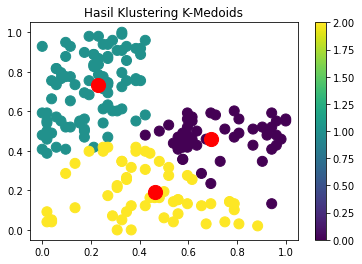

In [ ]:
#memvisualisasikan hasil kluster
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = dataset_cust.kluster, marker = 'o', alpha = 1, )

centers = kmedoids.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker='o');

plt.title('Hasil Klustering K-Medoids')
plt.colorbar (output)

plt.show()

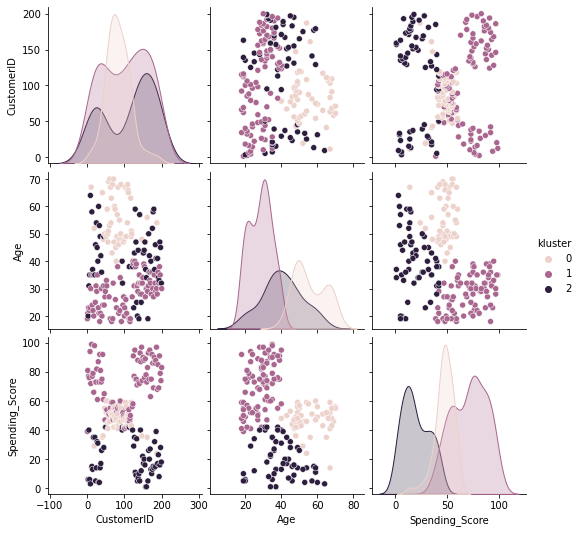

In [ ]:
sns.pairplot(dataset_cust, hue = 'kluster')